In [38]:
import pandas as pd
from llama_index.query_engine.pandas_query_engine import PandasQueryEngine
from dotenv import load_dotenv
import os
import openai
load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')
openai.api_key = api_key


In [39]:
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Conduct Simple Data Analysis

In [33]:
query_engine = PandasQueryEngine(df=df, verbose=True)
response = query_engine.query(
    "List the columns with missing values and the number of missing values. Only show missing values columns.",
)

> Pandas Instructions:
```
eval("df.isnull().sum()[df.isnull().sum() > 0]")
```
eval('df.isnull().sum()[df.isnull().sum() > 0]')
> Pandas Output: bmi                1462
smoking_status    13292
dtype: int64


In [42]:
response = query_engine.query(
    "Which age has the most stroke chance.",
)

eval("df[df['stroke'] == 1]['age'].value_counts().idxmax()")


In [43]:
eval("df[df['stroke'] == 1]['age'].value_counts().idxmax()")

79.0

### Simplify Data Visualization

eval("df.groupby('work_type')['stroke'].sum().plot(kind='bar')")


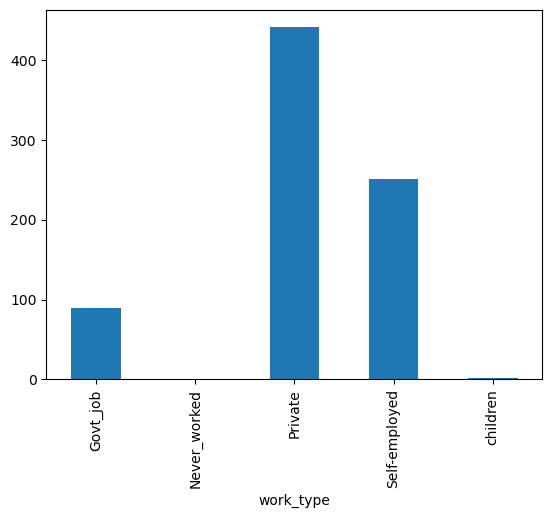

In [48]:
import pandas as pd
query_engine = PandasQueryEngine(df=df)
response = query_engine.query(
    "Visualize barchat of work type and stroke",
)


<Axes: xlabel='age'>

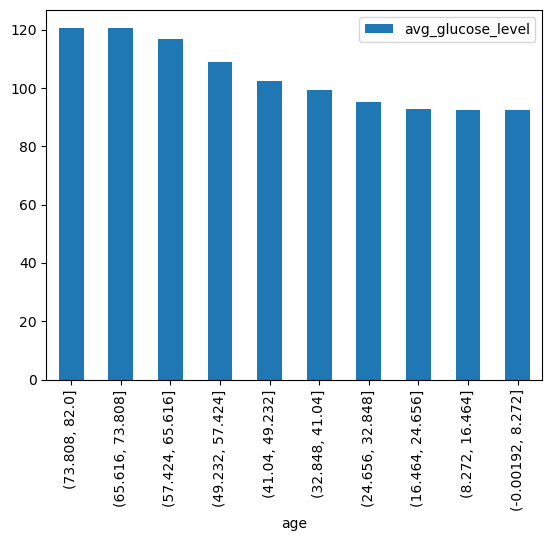

In [46]:
eval("df.groupby(pd.cut(df['age'], bins=10)).agg({'avg_glucose_level': 'mean'}).sort_values('avg_glucose_level', ascending=False).head(10).plot(kind='bar')")